# HURRICANE DAMAGE DETECTION

### Import Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from tensorflow import keras
from skimage.transform import resize
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
pwd

'C:\\Users\\windows 11\\Edure\\Deep Learning\\Capstone Project\\Hurricane Damage Detection'

In [3]:
import glob

### Fetch the testing data


In [4]:
damage = glob.glob('test/damage/*.jpeg')
no_damage = glob.glob('test/no_damage/*.jpeg')


In [5]:
damage_test = glob.glob('test_another/damage/*.jpeg')
no_damage_test = glob.glob('test_another/no_damage/*.jpeg')

In [6]:
damage_test

['test_another/damage\\-95.01509200000001_29.46552.jpeg',
 'test_another/damage\\-95.05040699999999_30.022252.jpeg',
 'test_another/damage\\-95.05148299999999_30.038177.jpeg',
 'test_another/damage\\-95.05198100000001_30.013099.jpeg',
 'test_another/damage\\-95.05575999999999_30.00667.jpeg',
 'test_another/damage\\-95.05600799999999_30.038342.jpeg',
 'test_another/damage\\-95.05779799999999_30.039309999999997.jpeg',
 'test_another/damage\\-95.06185500000001_30.03831.jpeg',
 'test_another/damage\\-95.06228399999999_30.040324.jpeg',
 'test_another/damage\\-95.06315699999999_29.831297999999997.jpeg',
 'test_another/damage\\-95.06329699999999_30.037322999999997.jpeg',
 'test_another/damage\\-95.06425899999999_30.006864.jpeg',
 'test_another/damage\\-95.06433299999999_30.037716999999997.jpeg',
 'test_another/damage\\-95.06512099999999_29.832007.jpeg',
 'test_another/damage\\-95.06539000000001_30.039456.jpeg',
 'test_another/damage\\-95.06555300000001_30.059072999999998.jpeg',
 'test_another

### Find the number of images in the Training and Testing set

In [7]:
print(f'Number of images in Training set are\nDamage:{len(damage)}')
print(f'No Damage:{len(no_damage)}')
print(f'Damage test:{len(damage_test)}')
print(f'No Damage test:{len(no_damage_test)}')

Number of images in Training set are
Damage:1000
No Damage:1000
Damage test:432
No Damage test:248


### Store all the images inside a list and create a list with the corresponding labels

#### For Training set

In [8]:
image = []
label = []

for i in damage:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

for i in no_damage:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

### For Testing Set

In [9]:
image_test = []
label_test = []

for i in damage:
    img = plt.imread(i)  
    image_test.append(img)
    label_test.append(0)

for i in no_damage:
    img = plt.imread(i) 
    image_test.append(img)
    label_test.append(1)

### Shuffle both image list and label list (In both Training and testing set)

In [10]:
image, label = shuffle(image, label, random_state=100)
image_test, label_test = shuffle(image_test, label_test)

In [11]:
len(label_test)

2000

In [12]:
len(image_test)

2000

### Plot a few images from our shuffled list with its corresponding label (Either from training or test set)

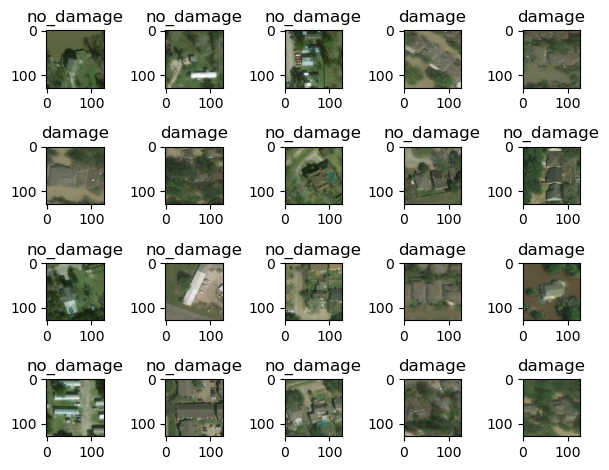

In [13]:
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(image[i])
    plt.title(label[i])
    if label[i]==1:
        plt.title('no_damage')
    else:
        plt.title('damage')
    plt.tight_layout()

### Reshape the images both training and testing set

In [14]:
Xtrain = []
for i in image:
    Xtrain.append(resize(i,(224,224,3)))
Xtrain = np.array(Xtrain)

In [15]:
Xtest = []
for i in image:
    Xtest.append(resize(i, (224,224,3)))
Xtest = np.array(Xtest)

### create numpy arrays named y_train and y_test from our training and testing label lists we created earlier

In [16]:
ytrain = np.array(label)
ytest = np.array(label_test)

### Plot some of our reshaped images

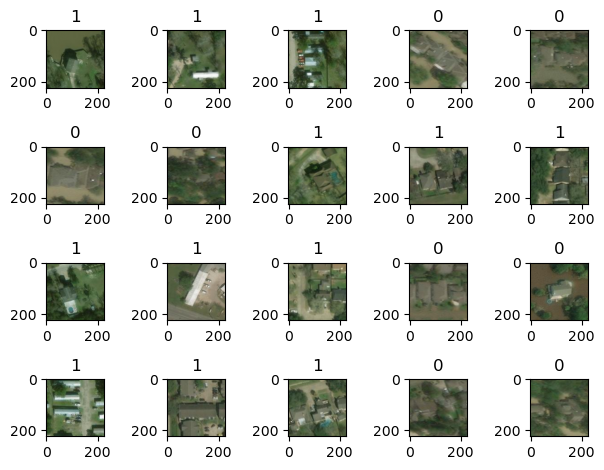

In [17]:
for i in range(20):
    plt.subplot(4,5, i+1)
    plt.imshow(Xtrain[i])
    plt.title(label[i])
    plt.tight_layout()

### Check the shape of X_train and X_test and y_train and y_test

In [18]:
print(f"Shape of Xtrain is:", Xtrain.shape)
print(f"Shape of Xtest is:", Xtest.shape)
print(f"Shape of ytrain is:", ytrain.shape)
print(f"Shape of ytest is:", ytest.shape)

Shape of Xtrain is: (2000, 224, 224, 3)
Shape of Xtest is: (2000, 224, 224, 3)
Shape of ytrain is: (2000,)
Shape of ytest is: (2000,)


### Create a keras Sequential model with convolution layers, Flatten and Hidden layers

In [19]:
model= keras.models.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Conv2D(32,(3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')        
])

C:\RESHMA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile model

In [20]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### check summary

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,972,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,977,185 (22.80 MB)

 Trainable params: 5,977,185 (22.80 MB)

 Non-trainable params: 0 (0.00 B)

### Train the Model

In [22]:
model.fit(Xtrain, ytrain, epochs = 10, validation_split = 0.1)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 26s 382ms/step - accuracy: 0.5146 - loss: 1.3125 - val_accuracy: 0.5100 - val_loss: 0.7868
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 15s 258ms/step - accuracy: 0.6856 - loss: 0.6048 - val_accuracy: 0.7950 - val_loss: 0.5217
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 16s 281ms/step - accuracy: 0.7638 - loss: 0.5112 - val_accuracy: 0.8050 - val_loss: 0.4675
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 16s 281ms/step - accuracy: 0.8527 - loss: 0.4021 - val_accuracy: 0.8300 - val_loss: 0.4551
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 293ms/step - accuracy: 0.8888 - loss: 0.3138 - val_accuracy: 0.8050 - val_loss: 0.4496
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 16s 287ms/step - accuracy: 0.9007 - loss: 0.2817 - val_accuracy: 0.8300 - val_loss: 0.4015
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 16s 283ms/step - accuracy: 0.9295 - loss: 0.1996 - val_accuracy: 0.7550 - val_loss: 0.5917
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 16s 285ms/step - accuracy: 0.9586 - loss: 0.1314 - val_accu

### Evaluate the model

In [23]:
model.evaluate(Xtrain, ytrain)

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9924 - loss: 0.0409


[0.08501674979925156, 0.9785000085830688]

### Predict the Model

In [24]:
ypred = model.predict(Xtest)

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step


In [25]:
ypred = ypred.argmax(axis=1)

### Plot X_test with label from our prediction

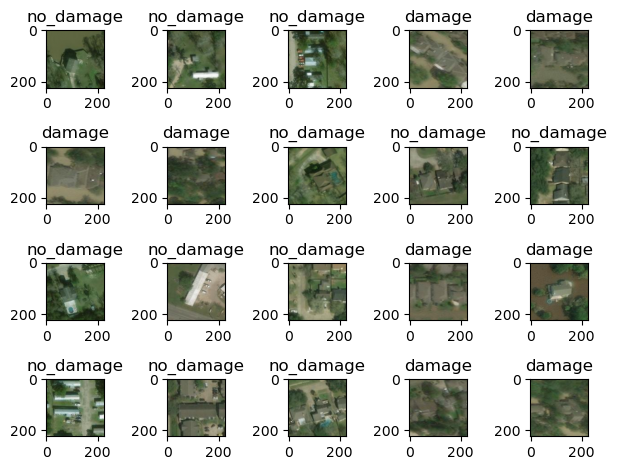

In [26]:
for i in range(20):
    plt.subplot(4,5, i+1)
    plt.imshow(Xtest[i])
    if label[i]==1:
        plt.title('no_damage')
    else:
        plt.title('damage')
    plt.tight_layout()

### Visualise confusion matrix on a heatmap

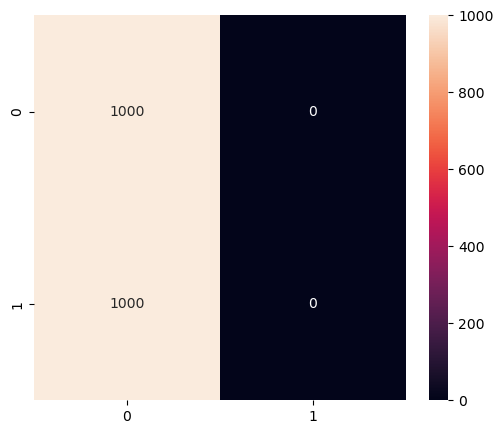

In [27]:
plt.figure(figsize = (6,5))
sns.heatmap(confusion_matrix(ytest, ypred), annot = True, fmt = 'd')
plt.show()